# Digit recognizer - not done yet

This is my first data computer vision project.

I will use the MNIST Dataset to train a model to recognize numbers written in by hand.


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from keras.utils import to_categorical


In [22]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# 1. Exploring the dataset

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = train.copy()
df_test = test.copy()

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Every row is an image, when the "label" column specify the number of that image.

Each image is made of 28 pixels wide and 28 pixels long (so there are a total of 784 pixels in each image).

The values of each pixel are the brightness level of the pixel (when 0 is the brightest and 255 is the darkest).


## 1.1 Features 

+ **Label**: The Target variable.
+ **Pixels**: The smallest unit of a Digital Image or Graphic that can be displayed on Digital Display Device.

Computers, in contrast to humans see the image as 2-dimensional arrays of numbers, known as pixels.

![](https://www.videonet9.com/assets/news/komp.jpg)

In [5]:
print(f"Train shape : {df.shape}")
print(f"Test shape : {df_test.shape}")

Train shape : (42000, 785)
Test shape : (28000, 784)


Each image is 28 pixels height and 28 width (squares), with 784 pixels in total.
Each pixle have a pixel-value, indicating the lightness or darkness of that pixel (higher = lighter).
There is one extra column in Training sample called "Label" which is the Digit drawn by the user

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


NO NAN VALUES!!!

In [7]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


I will use pyplot.imshow() which display an image, i.e. data on a 2D regular raster.

# 2. Visualize the data
## 2.1 Plotting random images

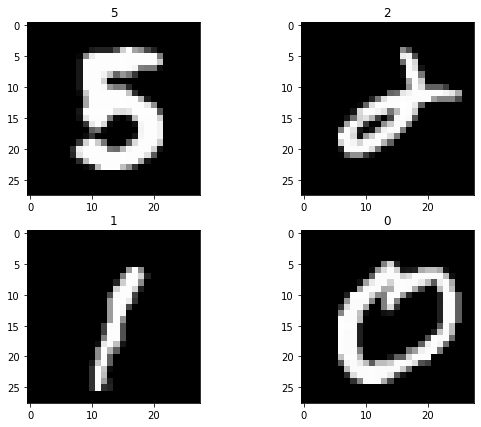

In [8]:
labels = df.iloc[:,0]
pixels = df.iloc[:,1:]
def rnd_visualization(imgs,labels) :
    fig, ax = plt.subplots(2, 2, figsize=(9,7))
    for i in ax:
        for j in i:
            rnd = np.random.randint(imgs.shape[0])
            j.set_title(labels[rnd])
            j.imshow(imgs.values[rnd].reshape(28,28),cmap='gray')

rnd_visualization(pixels, labels)

Let's check if we really got all the numbers and if the distribution is fairly equal:

Text(0.5, 1.0, "Distribution of Label's")

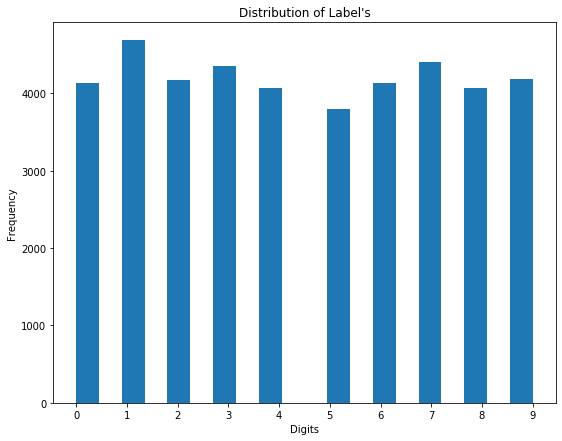

In [9]:
fig = plt.figure(figsize=(9,7))
labels.value_counts()
plt.hist(df["label"], bins=20)
plt.xticks(np.arange(0,10))
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Distribution of Label\'s')

# 3. Data preprocessing

We'll notice that Y is the number (labeled), and x is the pixel columns when each pixel is filled by a number (that define the color of that pixel).

In [10]:
seed = 42
np.random.random(seed)
y = df.label
X = df.drop("label", axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

+ I'll need to convert the data from 1D vector to 3D matrices (28X28X1).
+ Keras uses the last dimension for the channels, so because our MNIST is only grayscale this extra dimension is 1. 
  But, if this had been RGB images i would use 3 channels (X3) for RGB.

In [11]:
# reshape(examples, height, width, channels)
# more about the exapmles parameter: https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
df_test = df_test.values.reshape(-1, 28, 28, 1)

Normalize
$$x = (x - min) / (max - min)$$


The point of normalzie the data is for 2 main reasons:
1. Helps remove distortions caused by Light and Shadows in an Image
2. Brings all the feature to equal level.
3. Helps Gradient Descent to Converge much faster.

In [12]:
df.dtypes.head()

label     int64
pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
dtype: object

In [13]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
df_test = df_test.astype("float32")/255

I'll one hot encode the labels (which are numbers between 0-9), e.g 5 will be [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [34]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# 4. Training the CNN